#  Urban Sound Dataset
In this notebook we will use the Normal Equation, Gradient Descent and Perceptron Learning. Furthermore, we will check the accuracy.

In [1]:
#Importing relevant libraries
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

In [2]:
data = pd.read_csv('D:/Projects/MLProjects/UrbanSound8K/metadata/UrbanSound8K.csv')

In [3]:
#Let's see what this metadata file constitutes of
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
# Count the number of files in each of the folds
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [5]:
from librosa import display

Now we shall see a random .wav file from the dataset and see the features it has

In [6]:
#Feature set for a random "dog bark" file
y, sr = librosa.load('D:/Projects/MLProjects/UrbanSound8K/audio/fold5/100032-3-0-0.wav')
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40, fmax=8000)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=40)
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=40)
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr, n_chroma=40)
melspectrogram.shape, chroma_stft.shape, chroma_cq.shape, chroma_cens.shape, mfccs.shape

((40, 14), (40, 14), (40, 14), (40, 14), (40, 14))

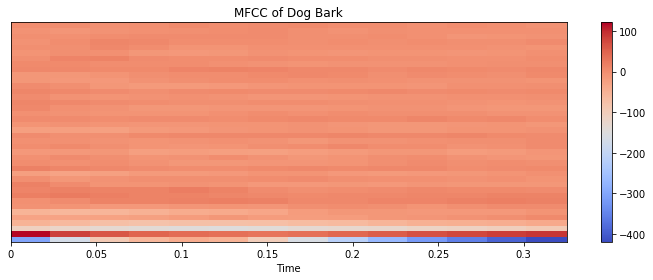

In [7]:
# Lets plot and examine the MFCC of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis ='time')
plt.colorbar()
plt.title('MFCC of Dog Bark')
plt.tight_layout()

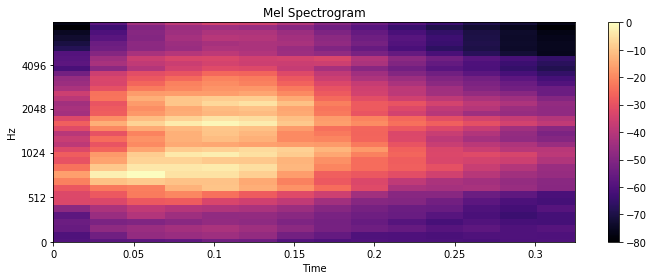

In [8]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram, ref=np.max), y_axis='mel', fmax = 8000, x_axis = 'time')
plt.colorbar()
plt.title('Mel Spectrogram')
plt.tight_layout()

In [9]:
#Feature set assembled for a sample file
y, sr = librosa.load('D:/Projects/MLProjects/UrbanSound8K/audio/fold5/204408-2-0-83.wav')
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T, axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40, fmax=8000).T, axis=0)
chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=40).T, axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=40).T, axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr, n_chroma=40).T, axis=0)
melspectrogram.shape, chroma_stft.shape, chroma_cq.shape, chroma_cens.shape, mfccs.shape

((40,), (40,), (40,), (40,), (40,))

In [10]:
#Stacking and reshaping the features
features = np.reshape(np.vstack((mfccs, melspectrogram, chroma_stft, chroma_cq, chroma_cens)), (40,5))
features.shape

(40, 5)

In [10]:
from tqdm import tqdm

In [12]:
# First we will pre-process using only the MFCC Feature
X_train = []
X_test = []
y_train = []
y_test = []
path = "D:/Projects/MLProjects/UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    if(fold_no!='10'):
      X_train.append(mfccs)
      y_train.append(label)
    else:
      X_test.append(mfccs)
      y_test.append(label)

100%|██████████| 8732/8732 [49:54<00:00,  4.51it/s]  


In [13]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]
path="D:/Projects/MLProjects/UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename, duration=5.0)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
    if(fold_no!='10'):
      X_train.append(features)
      y_train.append(label)
    else:
      X_test.append(features)
      y_test.append(label)

  1%|          | 67/8732 [00:59<2:13:46,  1.08it/s]C:\Users\alina\Anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
100%|██████████| 8732/8732 [2:13:33<00:00,  1.34it/s]  


In [14]:
len(X_train) + len(X_test)

8732

In [15]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7895, 40, 5), (837, 40, 5), (7895,), (837,))

In [16]:
#reshaping into 2d to save in csv format
X_train_2d=np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test_2d=np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
X_train_2d.shape,X_test_2d.shape

((7895, 200), (837, 200))

In [39]:
# Saving 2d Numpy Data into csv files
np.savetxt("train_data.csv", X_train_2d, delimiter=",")
np.savetxt("test_data.csv",X_test_2d,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")

In [69]:
from numpy import genfromtxt
X_train = pd.read_csv('train_data.csv').values
X_test = pd.read_csv('test_data.csv').values
y_train = pd.read_csv('train_labels.csv').values
y_test = pd.read_csv('test_labels.csv').values

In [70]:
#shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7894, 200), (836, 200), (7894, 1), (836, 1))

## Normal Equation Implementation

We will be implementing the normal equation.

In [51]:
# Finding the transpose of the Train Data
transpose_matrix = X_train.transpose()
transpose_matrix.shape

(200, 7894)

In [52]:
# This will be followed by the matrix multiplication of the 'transpose_matrix' and 'X_train'
matrix_mult = np.matmul(transpose_matrix , X_train)
matrix_mult.shape

(200, 200)

In [53]:
#Inverse of the 'matrix_mult'
inverse = np.linalg.pinv(matrix_mult)
inverse.shape

(200, 200)

In [54]:
# Matrix Multiplication of the 'transpose_matrix' and 'y_train'
mult_ = np.matmul(transpose_matrix, y_train)
mult_.shape

(200, 1)

In [55]:
# This is the final weight
result_ = np.matmul(inverse,mult_)
result_.shape

(200, 1)

In [56]:
#Checking shape of 'X_test'
X_test.shape

(836, 200)

In [57]:
# Making final predictions on the 'X-test' data
y_pred = np.dot(X_test, result_)

In [58]:
#y_test
y_pred

array([[ 5.61837189e+00],
       [ 1.51616182e-01],
       [ 4.46435482e+00],
       [-4.00306970e+01],
       [ 3.27176182e+00],
       [ 4.05026910e+00],
       [ 3.88093441e+00],
       [ 3.72388879e+00],
       [ 3.85537997e+00],
       [ 3.71794149e+00],
       [ 4.22977749e+00],
       [ 4.03675044e+00],
       [ 5.13480093e+00],
       [ 4.61756355e+00],
       [ 4.23736096e+00],
       [ 4.23696979e+00],
       [ 4.23983388e+00],
       [ 2.24200773e+00],
       [ 2.99147569e+00],
       [ 3.02675281e+00],
       [ 3.23709938e+00],
       [ 3.23153707e+00],
       [ 2.65824267e+00],
       [ 3.33728981e+00],
       [ 3.77377648e+00],
       [ 3.74362837e+00],
       [ 3.59593071e+00],
       [ 3.52124336e+00],
       [ 2.97050429e+00],
       [ 2.61191548e+00],
       [ 2.96263849e+00],
       [ 2.86060101e+00],
       [ 2.95568167e+00],
       [ 2.76481887e+00],
       [ 3.70312076e+00],
       [ 3.25503317e+00],
       [ 3.21428488e+00],
       [ 3.34626622e+00],
       [ 3.4

## Gradient Descent Implementation

We shall be implementing gradient descent with the cost fucntion

In [62]:
#Normalizes each pixel column[-1,1]
#np.seterr(divide='ignore', invalid='ignore')
def normalize(X):
    M = X.shape[1]
    for i in range(M):
        if np.any(X[:,i]) != 0:
            min_value = X[:,i].min()
            max_value = X[:,i].max()
            X[:,i] =(2*X[:,i]- min_value - max_value)/(max_value - min_value)

def append_ones(X):
    s = X.shape[0]
    ones = np.ones(shape=(s,1))
    return np.concatenate((ones, X), axis=1)

# Hence using the normalize and append_ones on both 'X_train' and 'X_test'
X_train = np.array(X_train)
normalize(X_train)
X_train = append_ones(X_train)

X_test = np.array(X_test)
normalize(X_test)
X_test = append_ones(X_test)

In [74]:
# Now we need to create a vector for each label to be stored
y_target = []
for i in range(10):
    y_target.append(y_train.apply(lambda x: 1 if x == i else 0))

In [66]:
theta=[]

#Cost Function 
def cost(X, y , theta):
    dim = X.shape[0]
    dot_product = np.power(((X @ theta.T) - y), 2)
    return np.sum(dot_product) / (2 * dim)
    
#Gradient of the cost function
def grad_cost(X, y, theta):
    dim = X.shape[0]
    pred = np.dot(X,theta)
    c1 = 1/dim * np.transpose(pred-y)
    return np.transpose(np.dot(c1,X))

#Gradient descent 
def grad_descent(X, y, theta, learning_par, num_iter):
    for i in range(num_iter):
        theta = theta - learning_par*grad_cost(X,y,theta)
        
    return theta

In [73]:
# Main Implementation
for i in range(10):
    y_temp = np.array(y_target[i])
    y_temp = y_temp.reshape(y_train.shape[0],1)

    theta_temp = np.zeros(shape=(X_train.shape[1],1))

    learning_rate = 0.0000001
    iterations = 1000

    theta_temp = grad_descent(X_train,y_temp,theta_temp,learning_rate,iterations)
    theta.append(theta_temp)

In [88]:
result = [np.dot(X_test,theta[i]) for i in range(10)]
result = np.transpose(np.array(result)).reshape(X_test.shape[0],10)

prediction = (np.array([element.argmax() for element in result])).reshape(X_test.shape[0],1)

y_test = np.array(y_test)
y_test = y_test.reshape(y_test.shape[0],1)


accuracy = sum(prediction == y_test)[0]/(y_test.shape[0])
print('Accuracy is: {}'.format(accuracy))

Accuracy is: .765


The accuracy is very good, around 76.5%. We shall now implement Perceptron Learning and see if we can further improve.

## Perceptron Learning

Furthering our learning to see if this increases the accuracy

In [75]:
# Now we shall create functions to work on Perceptron Learning Model
def create_weights(data):
    a, b = np.shape(data)
    weights = np.random.rand(b,1)
    return weights

weights = create_weights(X_train)

In [77]:
def predict(points, weights):
    b = np.dot(points, weights)
    a = b>0
    return a*1

In [78]:
# Now we need to call this for all the 10 digits but first we need to make it work for one number
def one_digit(labels, number):
    return (labels == number)*1

In [79]:
# We shall use a function to update values, and call the predict function
def update(weights, points, labels, learning_rate=.1):
    predicted = predict(points, weights)
    temp = np.zeros(np.shape(weights))
    temp[:,0] = learning_rate*(labels-predicted)*points
    return temp+weights

In [80]:
# Now we shall train the perceptron on the training dataset
def perceptron(data, labels, weights, learning_rate = .001, iterations = 100):
    for j in range(0, iterations):
        for i in range(0, len(data)):
            weights = update(weights, data[i], labels[i], learning_rate)
    return weights

In [81]:
# Calling this for all 10 digits
def all_digits(data,labels):
    c,d = np.shape(data)
    w = create_weights(data)
    weights = []
    for i in range(0,  len(np.unique(labels))):
        z = one_digit(labels, i)
        a = perceptron(data, z, w, .1, 4)
        weights.append(a[:,0])
    return np.asarray(weights)

In [82]:
Value = all_digits(X_train, y_train)

In [83]:
def result(data, weights):
    a = np.dot(data,np.transpose(weights))
    b = len(np.shape(data))
    if b == 1:
        return np.argmax(a)
    return np.argmax(a, axis=1)


def fit(data, labels, weights):
    a = np.shape(labels)
    predicted = result(data, weights)
    correct = predicted == labels
    accuracy = np.sum(correct)/float(a[0])
    return accuracy

In [87]:
# Now we shall see the accuracy on the test dataset
print(fit(X_test, y_test, Value))

0.849


We can see an improvement from the gradient descent. The accuracy has increased further from 76.5% to 84.9%. This is a brilliant accuracy of the dataset.